In [ ]:
from sklearn.decomposition import PCA
from pandas import DataFrame
import gensim.downloader as api
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def show_DataFrame(dic, index):
    return DataFrame(dic, index=index).applymap(lambda x: (x[0], round(x[1], 2))).T.fillna(0)

In [ ]:
def plot_scatter(prjected_words_vectors, words, colors):
    plt.figure(figsize=(15,10))
    plt.scatter(prjected_words_vectors[:,0], prjected_words_vectors[:,1], linewidths=2, color=colors)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(prjected_words_vectors[i,0]-0.1, prjected_words_vectors[i,1]+0.08))

In [ ]:
wv_from_bin = api.load("glove-wiki-gigaword-200")

[==================================================] 100.0% 252.1/252.1MB downloaded


# Question 1

In [ ]:
words = ['micke', 'canada', 'pen', 'water', 'cat', 'tree', 'warm', 'blue', 'dark', 'country']    # Question 1

similar_words = dict()
for word in words:
    similar_words[word] = sorted(wv_from_bin.most_similar(word), key=lambda item: item[1], reverse=True)

show_DataFrame(similar_words, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
micke,"(kontinen, 0.69)","(larinto, 0.53)","(piia, 0.52)","(dankers, 0.5)","(muranen, 0.5)","(makarainen, 0.49)","(micro-history, 0.49)","(sakanyi, 0.49)","(arttu, 0.48)","(pny, 0.48)"
canada,"(canadian, 0.74)","(australia, 0.63)","(quebec, 0.62)","(ontario, 0.62)","(zealand, 0.6)","(britain, 0.59)","(united, 0.59)","(states, 0.58)","(alberta, 0.58)","(ottawa, 0.57)"
pen,"(ballpoint, 0.61)","(pens, 0.56)","(pencil, 0.5)","(ink, 0.49)","(le, 0.48)","(duick, 0.48)","(quill, 0.47)","(jean-marie, 0.45)","(argyl, 0.44)","(sovann, 0.44)"
water,"(drinking, 0.63)","(clean, 0.6)","(sewage, 0.59)","(groundwater, 0.59)","(irrigation, 0.59)","(waters, 0.59)","(drainage, 0.58)","(reservoir, 0.57)","(seawater, 0.57)","(potable, 0.57)"
cat,"(dog, 0.74)","(cats, 0.69)","(pet, 0.66)","(dogs, 0.62)","(rabbit, 0.56)","(monkey, 0.55)","(rat, 0.53)","(pig, 0.53)","(horse, 0.53)","(mouse, 0.51)"
tree,"(trees, 0.85)","(pine, 0.6)","(oak, 0.56)","(shrubs, 0.55)","(garden, 0.54)","(banyan, 0.53)","(planted, 0.53)","(bushes, 0.53)","(forest, 0.52)","(cedar, 0.51)"
warm,"(cool, 0.71)","(chilly, 0.7)","(warmer, 0.69)","(cold, 0.66)","(cooler, 0.63)","(dry, 0.61)","(sunny, 0.61)","(warmth, 0.6)","(humid, 0.6)","(temperatures, 0.59)"
blue,"(red, 0.75)","(yellow, 0.7)","(pink, 0.68)","(purple, 0.67)","(black, 0.67)","(green, 0.66)","(bright, 0.65)","(white, 0.63)","(gray, 0.62)","(dark, 0.61)"
dark,"(darker, 0.67)","(gray, 0.66)","(black, 0.65)","(bright, 0.65)","(shadows, 0.64)","(light, 0.61)","(darkness, 0.61)","(shades, 0.61)","(blue, 0.61)","(pale, 0.6)"
country,"(nation, 0.81)","(countries, 0.69)","(has, 0.68)","(now, 0.66)","(already, 0.66)","(well, 0.65)","(once, 0.65)","(government, 0.65)","(all, 0.64)","(most, 0.64)"


# Question 2

In [ ]:
words_groups = [['water',        'drinking',         'foot' ],       # Question 2
                ['dark',        'gray',         'sun' ],
                ['blue',        'red',         'hand' ],
                ['cat',        'dog',         'pen' ],
                ['canada',        'canadian',         'food' ]]


distances = dict()
for w1, w2, w3 in words_groups:
    distances[w1] = [(w2, wv_from_bin.distance(w1, w2)), (w3, wv_from_bin.distance(w1, w3))]

show_DataFrame(distances, ['Near Word', 'Far Word'])

,Near Word,Far Word
water,"(drinking, 0.37)","(foot, 0.65)"
dark,"(gray, 0.34)","(sun, 0.6)"
blue,"(red, 0.25)","(hand, 0.69)"
cat,"(dog, 0.26)","(pen, 0.74)"
canada,"(canadian, 0.26)","(food, 0.72)"


# Question 3

In [ ]:
words_groups = [['king',        'woman',    'man' ],
                ['actor',       'girl',     'boy' ],
                ['doctor',      'she',      'he'  ],
                ['homemaker',   'she',      'he'  ],
                ['football',    'woman',    'man' ]]


first_distances = dict()
second_distances = dict()
for w1, w2, w3 in words_groups:
    first_distances[str((str(w1), w2, w3))] = sorted(wv_from_bin.most_similar(positive=[w1, w2], negative=[w3]), key=lambda item: item[1], reverse=True)
    second_distances[str((w1, w2, w3))] = sorted(wv_from_bin.most_similar(positive=[w1, w3], negative=[w2]), key=lambda item: item[1], reverse=True)

In [ ]:
show_DataFrame(first_distances, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
"('king', 'woman', 'man')","(queen, 0.7)","(princess, 0.61)","(monarch, 0.59)","(throne, 0.58)","(prince, 0.58)","(elizabeth, 0.55)","(daughter, 0.54)","(kingdom, 0.53)","(mother, 0.52)","(crown, 0.52)"
"('actor', 'girl', 'boy')","(actress, 0.87)","(starring, 0.71)","(actresses, 0.69)","(actors, 0.69)","(starred, 0.68)","(screenwriter, 0.63)","(comedian, 0.63)","(film, 0.61)","(movie, 0.6)","(filmmaker, 0.58)"
"('doctor', 'she', 'he')","(nurse, 0.7)","(mother, 0.6)","(woman, 0.6)","(her, 0.59)","(physician, 0.57)","(pregnant, 0.57)","(dr., 0.56)","(doctors, 0.56)","(patient, 0.55)","(hospital, 0.55)"
"('homemaker', 'she', 'he')","(housewife, 0.71)","(schoolteacher, 0.61)","(widowed, 0.55)","(businesswoman, 0.55)","(mom, 0.55)","(waitress, 0.53)","(hairdresser, 0.53)","(mother, 0.52)","(socialite, 0.52)","(grandmother, 0.51)"
"('football', 'woman', 'man')","(basketball, 0.67)","(soccer, 0.64)","(volleyball, 0.58)","(league, 0.55)","(softball, 0.55)","(hockey, 0.54)","(rugby, 0.53)","(ncaa, 0.52)","(club, 0.52)","(collegiate, 0.52)"


In [ ]:
show_DataFrame(second_distances, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
"('king', 'woman', 'man')","(prince, 0.55)","(ii, 0.54)","(brother, 0.54)","(iii, 0.53)","(reign, 0.53)","(uncle, 0.52)","(kingdom, 0.5)","(henry, 0.5)","(kings, 0.5)","(iv, 0.48)"
"('actor', 'girl', 'boy')","(comedian, 0.61)","(starring, 0.6)","(actors, 0.58)","(starred, 0.56)","(movie, 0.55)","(brother, 0.55)","(father, 0.55)","(film, 0.53)","(musician, 0.53)","(filmmaker, 0.52)"
"('doctor', 'she', 'he')","(physician, 0.66)","(surgeon, 0.57)","(doctors, 0.57)","(medical, 0.56)","(him, 0.54)","(dr., 0.54)","(himself, 0.53)","(his, 0.52)","(hospital, 0.52)","(man, 0.51)"
"('homemaker', 'she', 'he')","(43-year, 0.59)","(schoolteacher, 0.59)","(42-year, 0.55)","(housewife, 0.55)","(55-year, 0.54)","(48-year, 0.53)","(bricklayer, 0.53)","(47-year, 0.52)","(44-year, 0.52)","(39-year, 0.52)"
"('football', 'woman', 'man')","(soccer, 0.68)","(baseball, 0.64)","(team, 0.63)","(basketball, 0.62)","(league, 0.62)","(players, 0.61)","(rugby, 0.61)","(club, 0.6)","(game, 0.58)","(hockey, 0.58)"


# Question 4

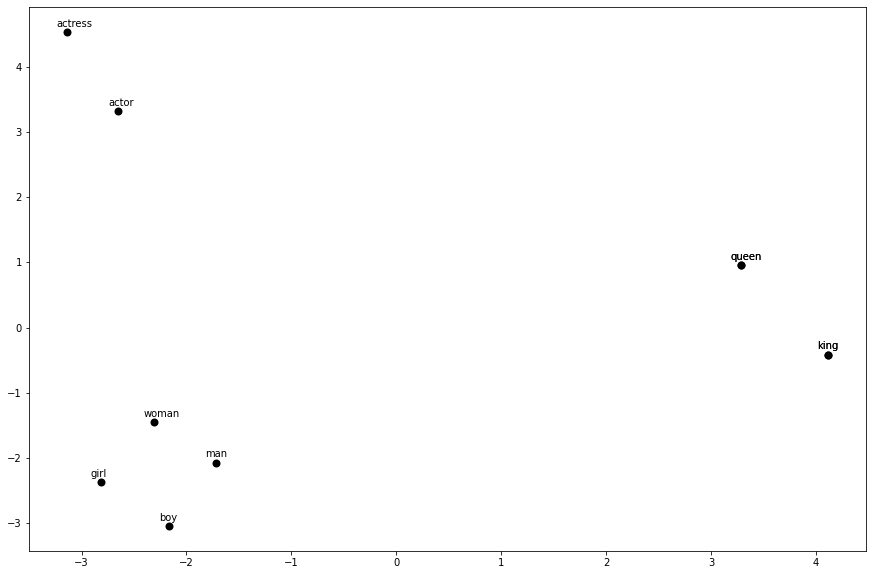

In [ ]:
words = ['woman', 'man', 'king', 'queen', 'boy', 'girl', 'actor', 'actress', 'king', 'queen']
words_vectors = [wv_from_bin.get_vector(word) for word in words]

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, 'black')

# Question 5

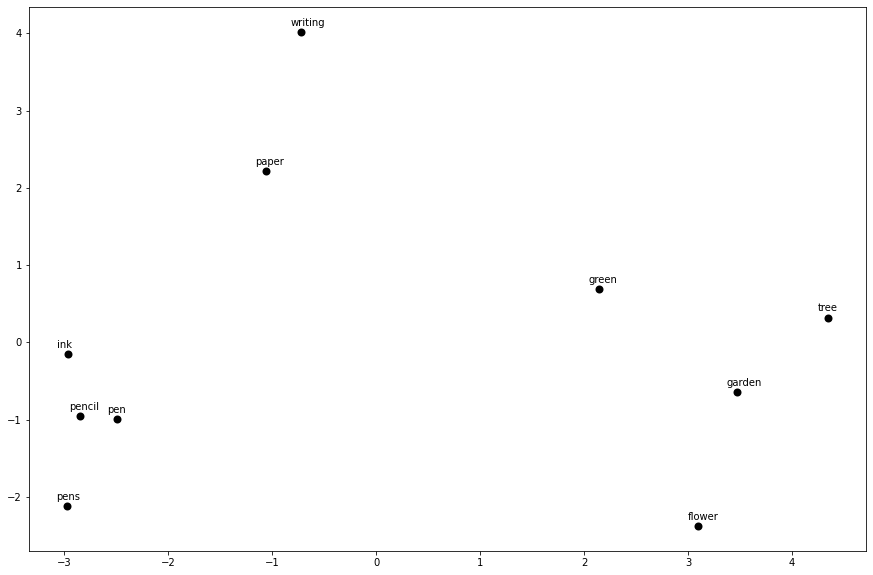

In [ ]:
# Question 5
words = ['tree', 'garden', 'green', 'flower', 'pen', 'paper', 'pencil', 'writing', 'pens', 'ink']
words_vectors = [wv_from_bin.get_vector(word) for word in words]

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, 'black')

# Question 6

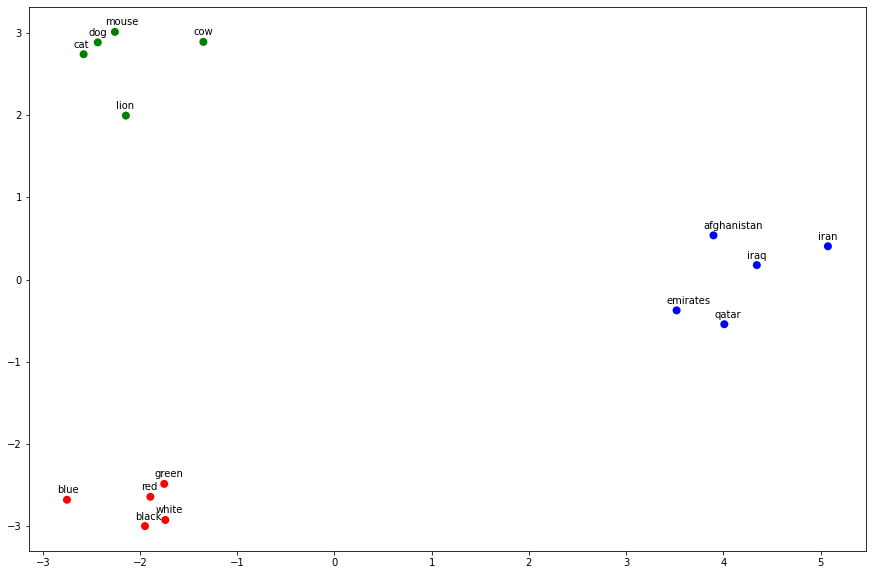

In [ ]:
words_group1 = ['cat', 'dog', 'mouse', 'cow', 'lion']
words_group2 = ['iran', 'iraq', 'qatar', 'emirates', 'afghanistan']
words_group3 = ['green', 'blue', 'red', 'white', 'black']

words_group1_vectors = [wv_from_bin.get_vector(word) for word in words_group1]
words_group2_vectors = [wv_from_bin.get_vector(word) for word in words_group2]
words_group3_vectors = [wv_from_bin.get_vector(word) for word in words_group3]

words = np.array(words_group1 + words_group2 + words_group3)
colors = ['green']*len(words_group1) + ['blue']*len(words_group2) + ['red']*len(words_group3)
words_vectors = np.array(words_group1_vectors + words_group2_vectors + words_group3_vectors)

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, colors)

# Question 7

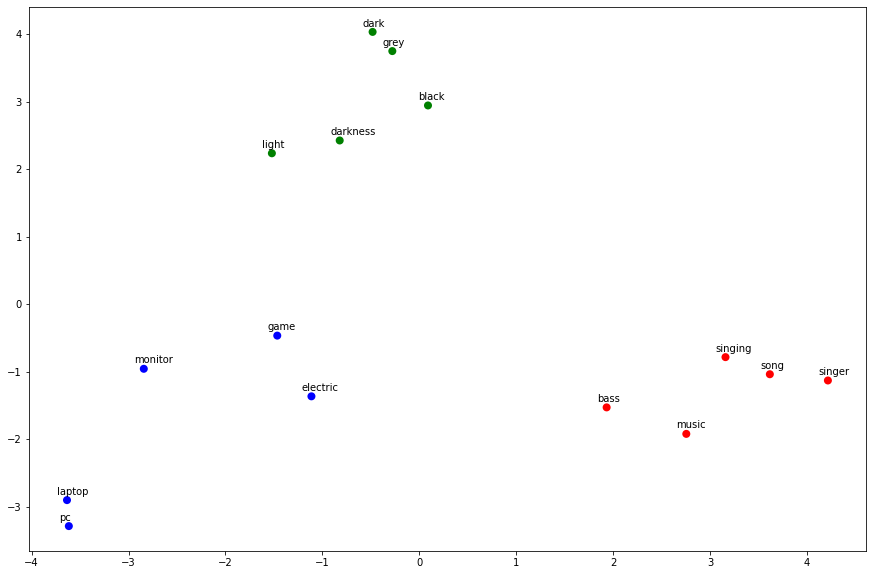

In [ ]:
# Question 7
words_group1 = ['dark', 'grey', 'black', 'light', 'darkness']
words_group2 = ['laptop', 'monitor', 'pc', 'game', 'electric']
words_group3 = ['singing', 'song', 'music', 'bass', 'singer']

words_group1_vectors = [wv_from_bin.get_vector(word) for word in words_group1]
words_group2_vectors = [wv_from_bin.get_vector(word) for word in words_group2]
words_group3_vectors = [wv_from_bin.get_vector(word) for word in words_group3]

words = np.array(words_group1 + words_group2 + words_group3)
colors = ['green']*len(words_group1) + ['blue']*len(words_group2) + ['red']*len(words_group3)
words_vectors = np.array(words_group1_vectors + words_group2_vectors + words_group3_vectors)

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, colors)

# Question 8

In [ ]:
many_dict = dict()
many_dict[str(('many', 'cow', 'one'))] = wv_from_bin.most_similar(positive=['many', 'cow'], negative=['one'])
show_DataFrame(many_dict, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
"('many', 'cow', 'one')","(cows, 0.64)","(cattle, 0.56)","(mad, 0.56)","(sheep, 0.56)","(pigs, 0.56)","(bovine, 0.56)","(herds, 0.56)","(beef, 0.53)","(chickens, 0.52)","(bse, 0.5)"


In [ ]:
many_dict = dict()
many_dict[str(('young', 'cow', 'old'))] = wv_from_bin.most_similar(positive=['young', 'cow'], negative=['old'])
show_DataFrame(many_dict, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
"('young', 'cow', 'old')","(mad, 0.6)","(cows, 0.58)","(sheep, 0.52)","(pigs, 0.52)","(herd, 0.51)","(bovine, 0.5)","(cattle, 0.49)","(infected, 0.48)","(spongiform, 0.48)","(animals, 0.48)"


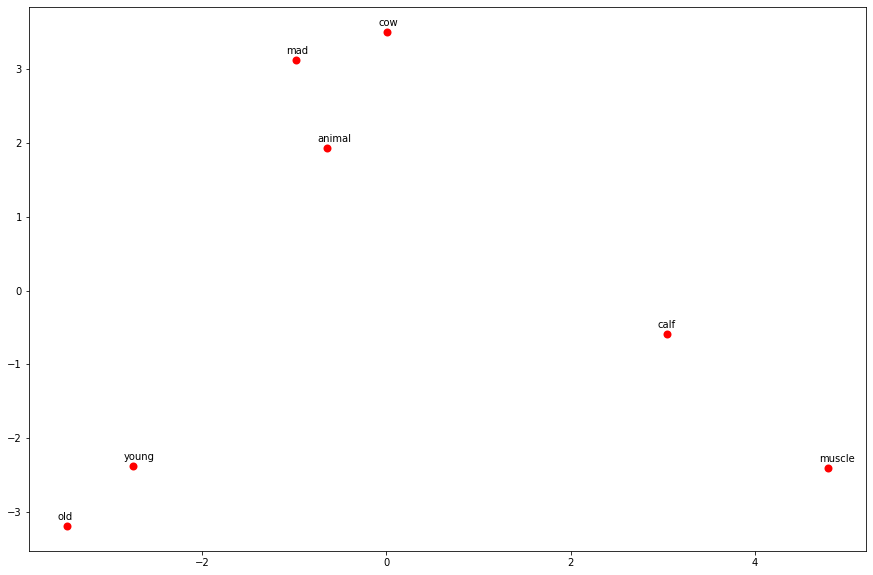

In [ ]:
# Question 8
words_group = ['old', 'cow', 'young', 'calf', 'animal', 'muscle', 'mad']
words_group_vectors = [wv_from_bin.get_vector(word) for word in words_group]
words = np.array(words_group)
words_vectors = np.array(words_group_vectors)
pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)
plot_scatter(prjected_words_vectors, words, 'red')